# Homework 2
Outline
* Import and Clean Data
* Visualize to see potential problems
* Fix problems if possible
* Try a model
* More fixing
* More modeling
* Beat the baseline

## Getting acquainted with the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

The first thing to do, as seen above, is import some useful libraries to better understand the data set. With those, I will now look at the data, get a feel for it, check for missing variables and outliers, and then see what I can do to fix it.

In [2]:
train_df = pd.read_csv("/Users/jacobbills/Desktop/python/all/train.csv") # import the data set

In [3]:
print(train_df.describe()) # shows various things

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [4]:
train_df.head(5) #another way of looking at the above

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info() #what variables do we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

What we've learned so far:
* There is a decent number of categorical variables, currently coded as objects
* 1460 observations. Certain variables have missing data, some like pool quality have very few things at all
* 81 variables, but that includes the id, which we will drop because that's how you kaggle

With this in mind, let's prepare an id-less dataframe and then start looking understanding the target. After learning more about the target, I will describe the rest of the data and clean it. After cleaning it, I will make dummies and move into modeling. As part of learning my target, I will import my outlier checking function and a new function to count outliers. Also as a note, I'm using [this](https://www.kaggle.com/mjidiba/a-beginner-s-guide-to-his-first-kaggle-project) as a guide for how to do things, though I don't think I follow it too much. 

In [6]:
train_id = train_df.Id
train_df.drop(columns = 'Id', inplace =True) #Gets rid of the id column, thanks random guy on kaggle
target_train = train_df.SalePrice #seperate data frame for our target

In [7]:
def outlier_check(variable, sensitivity):
    a = variable.std()
    b = variable.mean()
    c = sensitivity*a
    max_tail = b + c
    min_tail = b - c
    y = variable.max()
    z = variable.min()
    above_max = max_tail<=y
    below_min = min_tail>=z
    return max_tail , above_max , min_tail, below_min

def count_outliers(variable, sensitivity):
    x = outlier_check(variable, sensitivity)[0]
    y = outlier_check(variable, sensitivity)[2]
    x_counts = 0
    y_counts = 0
    for i in variable:
        if i <= x:
            x_counts = x_counts
        else:
            x_counts = x_counts + 1 
    for i in variable:
        if i >= y:
            y_counts = y_counts
        else:
            y_counts = y_counts + 1
    return x_counts, y_counts

(5, 0)
False


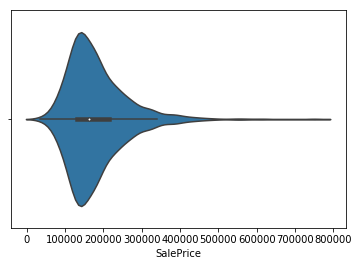

In [8]:
target = train_df.SalePrice
print(count_outliers(target, 5)) #choice of 5 sigma because we are only looking for extreme outliers
sns.violinplot(target) #to check the kernal density
print(target_train.isnull().any())

There are a few outliers but probably reasonable. The data is normally distributed but also very skewed so I'll scale it to a log variable.

(14.021310242415195, False, 10.02679155980355, False)


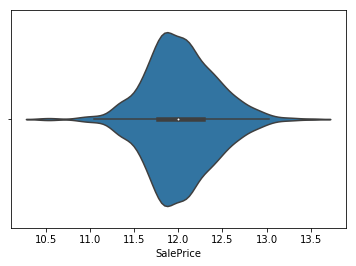

In [9]:
train_df.SalePrice = np.log(train_df.SalePrice)
target_train = np.log(target_train) #log because skewness
target = np.log(target)
sns.violinplot(target)
print(outlier_check(target, 5))

Now it is much less skewed. We know there is no missing variables and so we'll move on to understanding the other variables.

In [10]:
is_null = train_df.columns[train_df.isnull().any()]
print(is_null) ##checking for missing variables

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


All the ones with missing variables are objects, so I'll check the code book and figure out how to deal with them later, when I am feature engineering. For now, I'll just drop anything that is null and move onto outliers and correlations.

In [11]:
train_no_null = train_df.drop(columns = is_null)
train_no_null #dataset with columns that don't have null variables

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,11.870600
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,12.634603
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,12.206073
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,11.774520
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,0,0,0,0,0,1,2008,WD,Normal,11.678440


Let's look at how many variables we have now and then make a heat map to check correlations. This might help us identify what is most important and then check for outliers there first. Then we'll get rid of the objects by creating a bunch of dummy variables.

In [12]:
train_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non

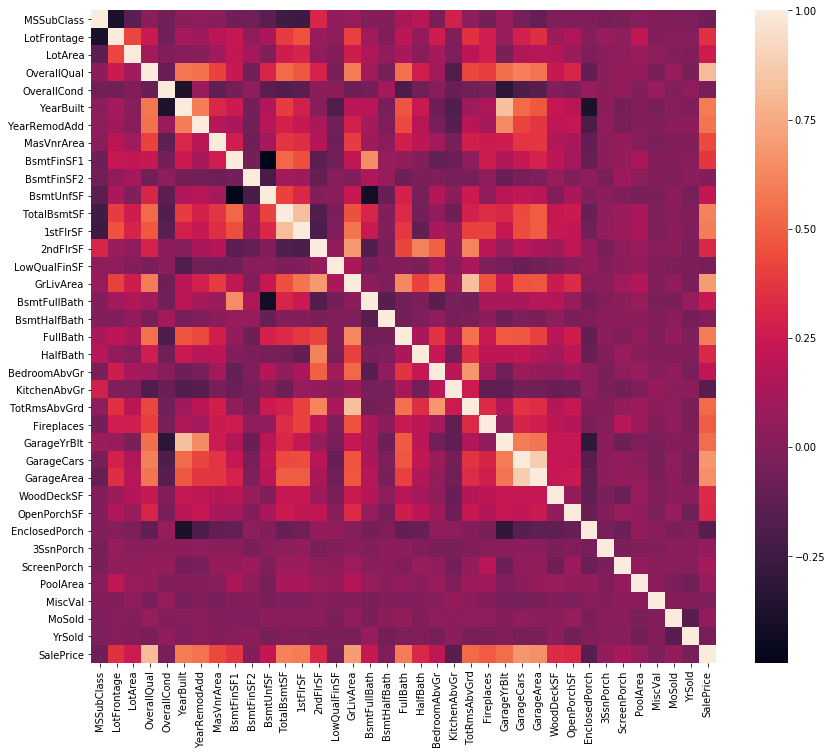

In [13]:
f , ax = plt.subplots(figsize = (14,12)) #Makes it bigger, thanks Kaggle guide
sns.heatmap(train_df.corr())

So there's a couple of clusters that we'll look at later. Right now the interest is which variables are correlated with the target. We can see that "Overall Quality", age, garage, and some of the sqft variables are the most highly correlated with the target. This is unsuprising. Let's do the dummy variable stuff right now.

In [14]:
with_dummies = pd.get_dummies(train_no_null)

Let's run a simple model and then later one, I'll go back and actually make good things, make some of the dummies ordinal, fill in missing variables and all sorts of other things that make this good

## Let's do some modeling
The first step is importing some useful functions from scikit

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

Scale before train-test split. Then 3 models, starting from linear regression. Then at least 2 others. Then feature engineer and go on.

In [16]:
scaler = StandardScaler()
with_dummies = with_dummies.drop(columns = 'SalePrice')
scaler.fit(with_dummies)
scaled_df = scaler.transform(with_dummies)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=.2, random_state = 11)

Okay, with the split let's do our first model, a simple linear regression. That gives a baseline and I'll see how it work. Then I'll go back and actually try to work with the data and turn it into something good.

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
print("Train MSE: {}".format(train_mse))
print('Test MSE: {}'.format(test_mse))

Train MSE: 0.009419100555188346
Test MSE: 1.7430840031241397e+25


In [19]:
## I took this from their website, why isn't this a normal thing you can import? 

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

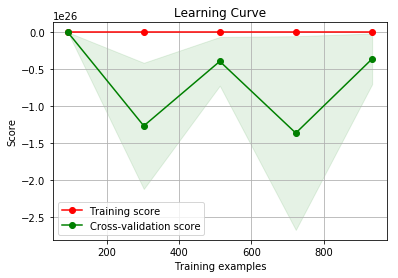

In [20]:
plot_learning_curve(lin_reg, "Learning Curve", X_train, y_train, cv=5)

Everything above this explains how I reached my conclusions. Everything after this will be filled in as needed, only leaving the best. So I'll have the best cleaing and feature engineering and models.

## Cleaning Data pt 2

So now that we know that this is in fact possible, lets go back and determine what should be fixed. Obviously there is a lot of missing data, so I'll look at those and figure out how to fill that in. But first, I think I'll see if there are certain outliers that aren't even worth filling in. The guide on Kaggle went about this by looking at things that were highly correlated and then viewing if there were outliers there. This seems reasonable, though I might not use the same things he used. 

/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


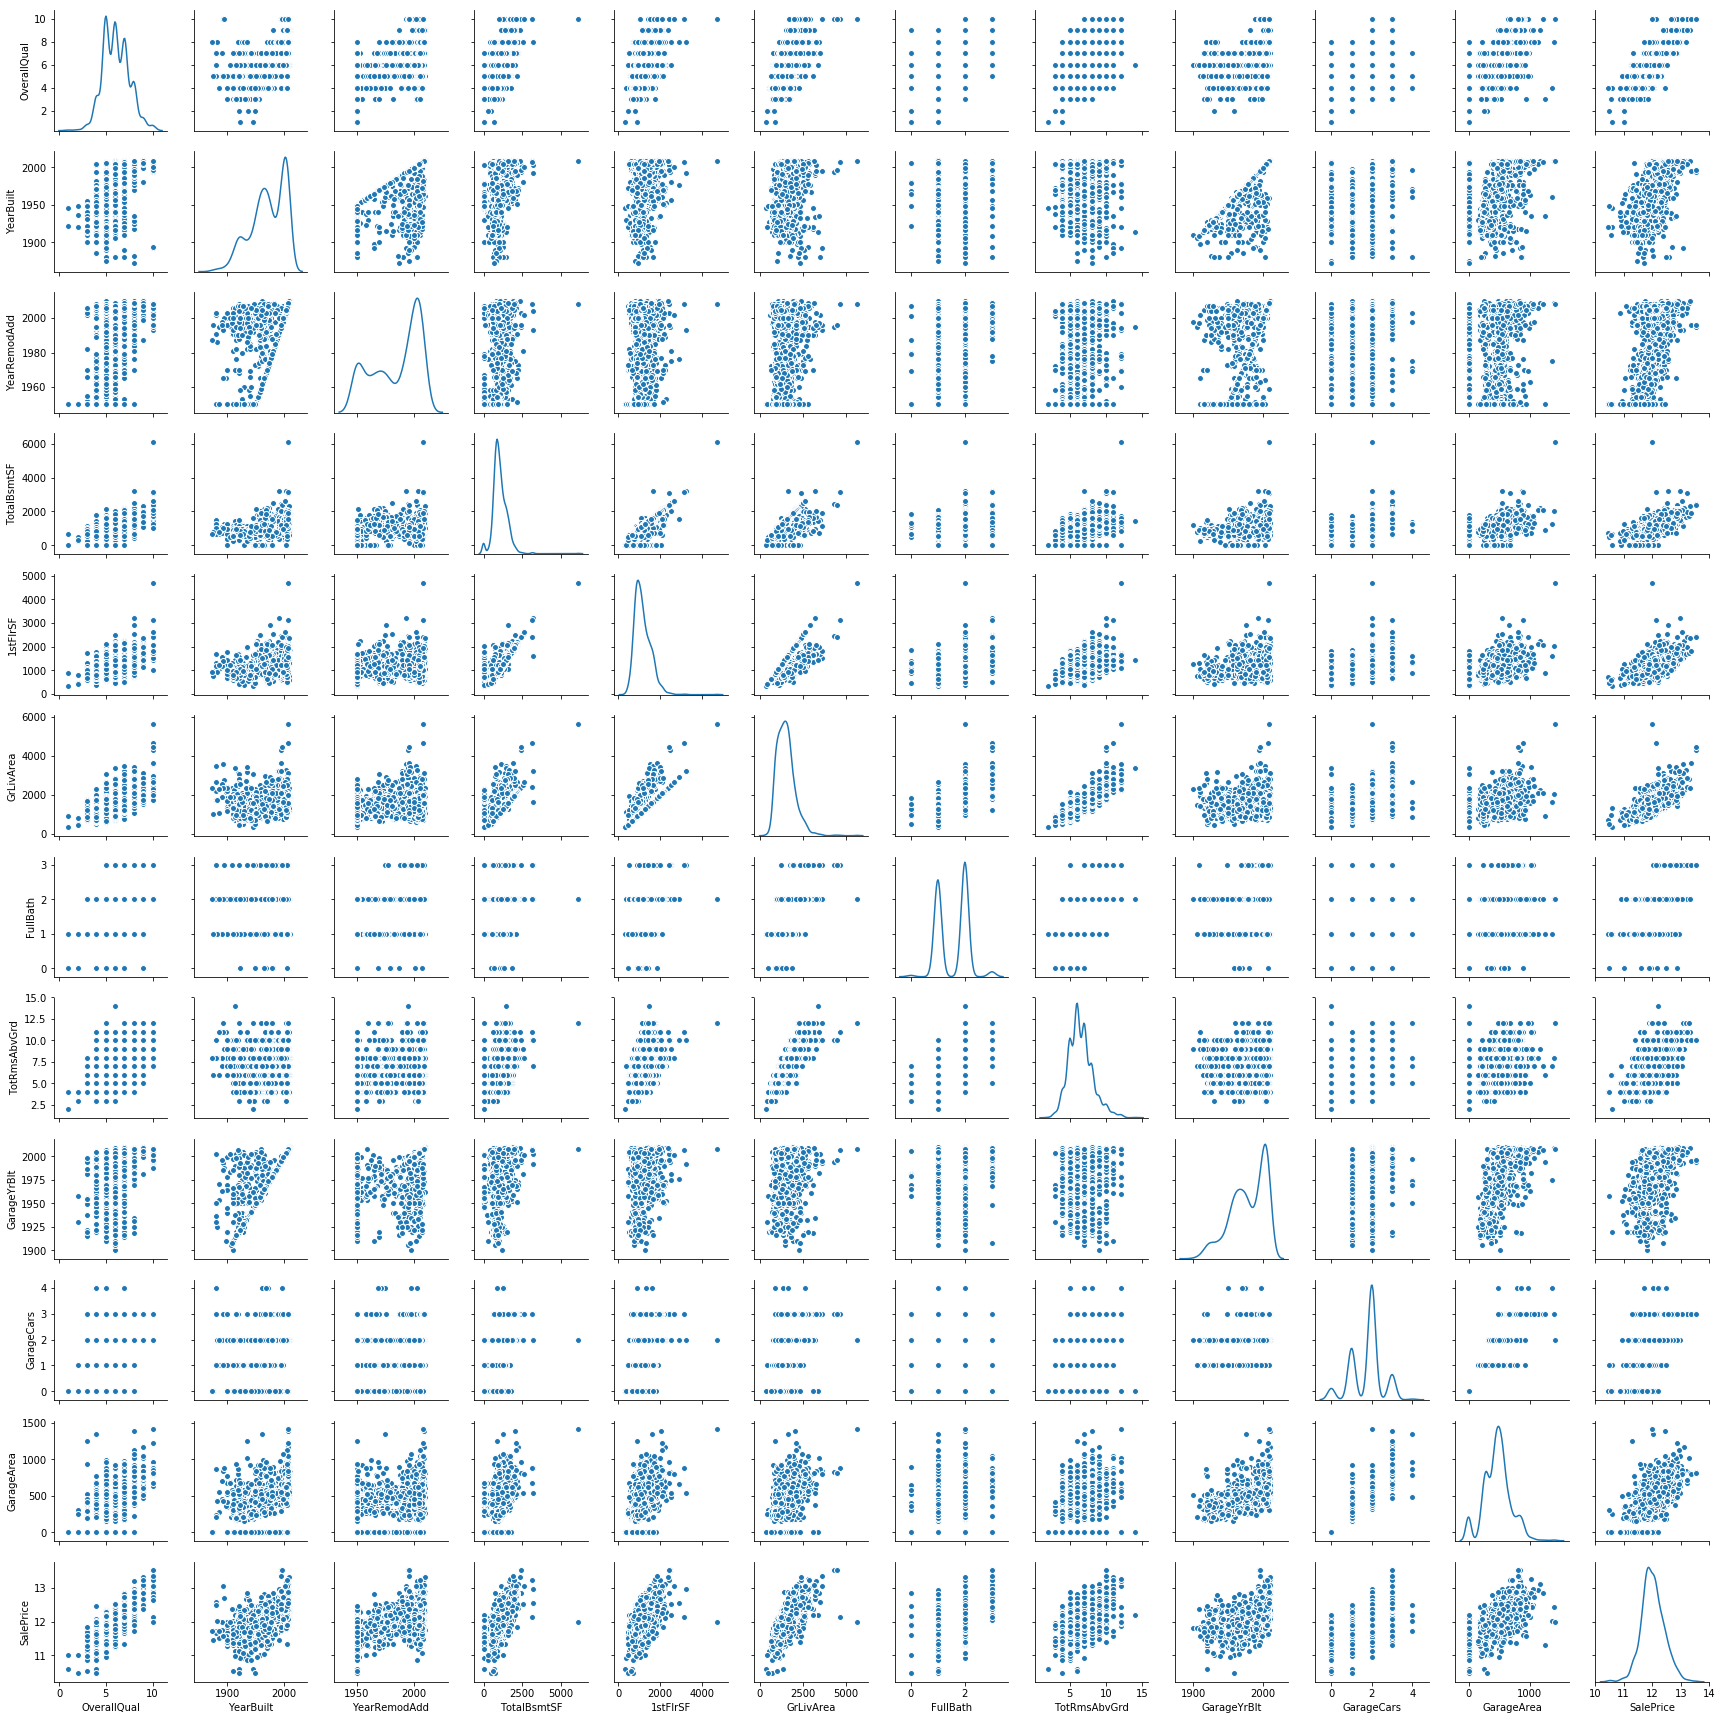

In [21]:
corr = train_df.corr()
corr_target = corr.SalePrice

def corr_extract(var, sensitivity): # definine a function that will tell me where there is high correlation
    y = dict() #the plan is to get a dictionary that gives me the name and value
    count = 0 # set up the counter
    for e in var:
        if abs(e)<sensitivity: #most common is lower correlation so I'll get rid of those first
            count = count + 1 #move to the next one
        elif abs(e)==1: # get rid of perfect correlation because that isn't very interesting
            count = count + 1 #
        else: 
            x = var.index[count] #extract the name from the series
            y[x] = e #key: index, value: correlation
            count = count + 1 # move to the next one
    return y 

ext_target = corr_extract(corr_target, .5)

def key_extract(dic):
    y = pd.DataFrame.from_dict(dic, orient='index') #turns the dictionary into a data frame
    y = y.index # list of the names in the dataframe
    return y

def dicpplot(dic, df, target): #function to make a pairplot from dictionary keys
    y = key_extract(dic)
    z = df[y] # new data frame that extracts those key columns from the original data frame 
    z[target] = df[target] # add the target
    g = sns.pairplot(z, size = 2 ,kind ='scatter',diag_kind='kde') #make a pairplot
    return g
    
dicpplot(ext_target, train_df, 'SalePrice')

That was a lot of work at first, but should be very useful for doing feature construction down the road, when trying to figure out which variables are correlated with which other ones. It seems here that there is one, maybe two outliers as far as size goes which also have an unusually low number of bathrooms and sale price. So I'll probably drop that one and then go to work on my missing data problem.

In [22]:
def outlier_drop(var, sensitivity, df): #drops outliers with a given variable and sensitivity
    x = outlier_check(var, sensitivity) # finds where we should be dropping from
    max_ = x[0] # ceiling
    min_ = x[2] # floor
    df.drop(df[var > max_].index,inplace = True) #drops them
    df.drop(df[var < min_].index,inplace = True)

drop_list = [train_df.TotalBsmtSF, train_df["1stFlrSF"], train_df.GrLivArea]

for e in drop_list:
    outlier_drop(e,5, train_df)
    
train_df.shape #tells us how many were dropped (by seeing how many are left)

/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1455, 80)

That removed 5 outliers overall, which is hopefully not too much. I'll run a few plots like I did earlier and then move onto filling in missing values and then working on all the objects and the like. 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


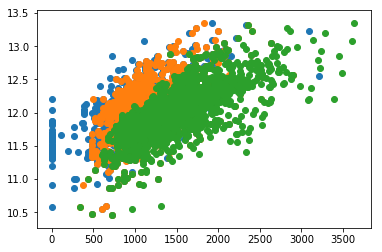

In [23]:
plt.scatter(train_df.TotalBsmtSF, train_df.SalePrice)
plt.scatter(train_df["1stFlrSF"], train_df.SalePrice)
plt.scatter(train_df.GrLivArea, train_df.SalePrice)
print(is_null)

There seems to be less outliers now so I guess it worked. Next the missing values. First, I looked at what things are missing values and then I checked those against the code book. Some of these are missing (like the alley and basements ones) because it simply isn't something associated with the house. These can probably be redone as 0 (especially since these all seem to be categorical variables). Others, like LotFrontage seem to be numeric, so I'm less sure how to deal with that. 

In [24]:
train_df[is_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1197 non-null float64
Alley           91 non-null object
MasVnrType      1447 non-null object
MasVnrArea      1447 non-null float64
BsmtQual        1418 non-null object
BsmtCond        1418 non-null object
BsmtExposure    1417 non-null object
BsmtFinType1    1418 non-null object
BsmtFinType2    1417 non-null object
Electrical      1454 non-null object
FireplaceQu     765 non-null object
GarageType      1374 non-null object
GarageYrBlt     1374 non-null float64
GarageFinish    1374 non-null object
GarageQual      1374 non-null object
GarageCond      1374 non-null object
PoolQC          5 non-null object
Fence           280 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 227.3+ KB


In [25]:
ext_target_low = corr_extract(corr_target, .35) #what is correlated with the target at a lower level (initial cleaning)
ext_target_low_key = key_extract(ext_target_low)
print(train_df[ext_target_low_key].head())

   LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0            7       2003          2003       196.0         706   
1         80.0            6       1976          1976         0.0         978   
2         68.0            7       2001          2002       162.0         486   
3         60.0            7       1915          1970         0.0         216   
4         84.0            8       2000          2000       350.0         655   

   TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  \
0          856       856       1710         2             8           0   
1         1262      1262       1262         2             6           1   
2          920       920       1786         2             6           1   
3          756       961       1717         1             7           1   
4         1145      1145       2198         2             9           1   

   GarageYrBlt  GarageCars  GarageArea  
0       2003.0           2 

Looking here, only LotFrontage, GarageYrBlt, and MasVnrArea have missing variables. My guess is that that means that those are not applicable to the house, so replaces missing variables with 0 should not be a problem (This proved to be untrue at least when applied to the test set). Following that helpful guide, I'll try to fill in the best sorts of numbers for these. He suggests using median and the like, but I'm not sure. It seems reasonable to assume that for GarageYrBlt, I can just replace it with the YrBlt variable. LotFrontage is correlated with various qualities and also lot size, so I'll use that. Masonry is correlated with age and other things like that. I'll use the mean (since the guide suggests that) and also because that will probably not mess the data up too much while keeping it from using 0 as an outlier problem (though looking at the data again, I'm not sure if that's really an issue)

Then I'll figure out how to deal with the years data. I feel the best way is probably to bin it into a series of categories and then use those categories as dummy variables. (or not, because this is had and I need help). 

Actually I'm going to follow the various guides and combine the two data sets because I'm having trouble cleaning them separately and I don't know why

In [26]:
testr = pd.read_csv("/Users/jacobbills/Desktop/python/all/test.csv")
test_id = testr.Id
testr.drop(columns = 'Id', inplace =True) #Gets rid of the id column, thanks random guy on kaggle


In [27]:
ntrain = train_df.shape[0] #full splitting the data sets later
ntest = testr.shape[0]
target = train_df.SalePrice.values #just making sure this exists
all_data = pd.concat((train_df, testr)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [28]:
is_null = all_data.columns[all_data.isnull().any()]
print(is_null) ##checking for missing variables

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')


First set of missing things are the ones with lots of missing variables like pool quality and the like. I'm taking this from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard but that's because I knew I had to do something like this and just couldn't figure out how. These are all ones where missing data means nothing, so they are easy to fill in.

In [29]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

Next I'll deal with the messy "GarageYrBlt" and then throw in a new column that makes it so that I know if there was no garage built.

In [30]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0) 
all_data['NoGarage'] = all_data['GarageYrBlt'].mask(all_data['GarageYrBlt']>0) # new column showing which houses have no garage
all_data['NoGarage'] = all_data['NoGarage'].replace(to_replace=0, value=1) #replaces no garage with a 1 
all_data['NoGarage'] = all_data['NoGarage'].fillna(0) #fills in the rest
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].replace(0, all_data['YearBuilt'])
all_data[['GarageYrBlt', 'NoGarage']]

,GarageYrBlt,NoGarage
0,2003.0,0.0
1,1976.0,0.0
2,2001.0,0.0
3,1998.0,0.0
4,2000.0,0.0
5,1993.0,0.0
6,2004.0,0.0
7,1973.0,0.0
8,1931.0,0.0
9,1939.0,0.0


In [31]:
# Now dealing with lot frontage and Masonry
msn = corr_extract(corr.MasVnrArea, .3) #didn't end up using these after all and just when with the mean instead
lot = corr_extract(corr.LotFrontage, .3)
print(msn, lot)

all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mean(), inplace=True)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

{'OverallQual': 0.41187566727767955, 'YearBuilt': 0.31570706243619523, 'TotalBsmtSF': 0.3639362217744695, '1stFlrSF': 0.3445007468899201, 'GrLivArea': 0.3908566397384352, 'GarageCars': 0.3642036400698638, 'GarageArea': 0.37306648160023304, 'SalePrice': 0.43080852419510485} {'MSSubClass': -0.3863468853449303, 'LotArea': 0.4260950187718087, 'TotalBsmtSF': 0.39207457637917215, '1stFlrSF': 0.4571810019946558, 'GrLivArea': 0.40279741408532066, 'TotRmsAbvGrd': 0.35209594766022567, 'GarageArea': 0.34499672410648324, 'SalePrice': 0.3558784703859834}


In [32]:
all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean(), inplace=True)

In [33]:
is_null = all_data.columns[all_data.isnull().any()]
is_null #just checking how many are null 

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'KitchenQual', 'MSZoning', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

A lot that are left don't exist because they simply don't exist. This is true for a lot of the basement and garage variables. So I'll make lists of these and fill the categorials with "none" and the numerical ones with 0. 

In [34]:
dne_cond = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'KitchenQual'] #does not exist conditions
element_dne = ['GarageArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
               'TotalBsmtSF'] #does not exist but numbers
for e in dne_cond:
    all_data[e] = all_data[e].fillna('None')
    
for e in element_dne:
    all_data[e] = all_data[e].fillna(0)

We need to figure out the last of the missing variables, which means lots of looking at the code book. And also kernals online because I'm desparate to actually figure out how to clean this since my models are fine once I get the data cleaned. Codebook says "functional" is typical if not stated. Below I have a counter to check what is around. Utilities is prety useless, so I'll drop it and then I think everything else there's a clear modal value that I can use (and very little missing data).

In [35]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data = all_data.drop(['Utilities'], axis = 1)
modals = ['Electrical', 'Exterior1st', 'Exterior2nd', 'MSZoning', 'SaleType'] # things best filled in with mode
for e in modals:
    all_data[e] = all_data[e].fillna(all_data[e].mode()[0])

Modeling is basically showing that I need more variables, since filling in just the very high correlation ones is not enough. Also, I think the years variables are doing real weird things to my models, so it is time to fix that. ~~I think the best way to handle this will be to reduce the years to a few bins (or finding things highly correlated with year and then treating year as a string)~~ I did not figure out how to bin the years, so I just treated them as categorical variables. I also need to figure out which objects to turn into dummies and which to not even bother including. Lots of the objects are ordinal in nature, so I want to deal with that as well. The part with the label encoder I learned about from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard . I chose my own set of ordinal variables though and constructed the for loop to deal with that myself. 

In [36]:
ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
          'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    
from sklearn.preprocessing import LabelEncoder

order = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd': 4, 'Ex':5}

strings = ['MSSubClass','OverallCond','MoSold','YrSold', 'GarageYrBlt'] 
for e in strings:
    all_data[e] = all_data[e].apply(str) 
    
for c in all_data[strings]: ## Took this from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [37]:
for c in all_data[ordinal]:  
    all_data[c + 'label'] = all_data[c].map(order)    
    all_data.drop(columns = c)

In [38]:
all_data_dummies = pd.get_dummies(all_data) # gets dummies. If I had more time, I'd try to figure out what dummies it was pulling

Modeling shows that certain variables like Area are more important than others. So I'll make a new variable for area and see if that makes a difference

In [39]:
all_data_dummies.info()
all_data_dummies['AllArea'] = all_data_dummies['LotArea'] + all_data_dummies['GrLivArea'] + all_data_dummies['TotalBsmtSF'] + all_data_dummies['1stFlrSF'] + all_data_dummies['2ndFlrSF']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Columns: 311 entries, 1stFlrSF to Street_Pave
dtypes: float64(11), int64(36), uint8(264)
memory usage: 1.8 MB


And now we separate out the train and test sets again

In [40]:
train_dummies = all_data_dummies[:ntrain] # take the shape given earlier and then splits the data set back 
testr_dummies = all_data_dummies[ntrain:]

I extracted the variables with positive coefficients and will now see how my models perform using just those (I know I'm writing here but for work flow purposes this is done in the modeling section). It ends up that it greatly improved my two linear regression models but did sightly worse (basically the same) on the elastic net and that's still my best model so far. Really it seems that I'll need to do more feature construction and I don't really have time for that, but at least I made it this far. I will try a nearest neighbors regression with the coef_list though. I then tried a polynomial fitting with elastic net. Because of computing power concerns, I did it with a variety of different coefficient sets (varied the sensitivity of the function) and none of them performed better than the basic elastic net (~~0.13104~~ 0.13078 is my best score, using the ordered categorical variables), further confirming the need for better feature construction. Sadly time is running out and I only have two submissions left for today, so I doubt I'll be doing much better than that.  

## Modeling but for real

In [41]:
scaler = StandardScaler()
scaler.fit(train_dummies)
scaled_df = scaler.transform(train_dummies)
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=.2, random_state = 11)

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
print("Train MSE: {}".format(train_mse))
print('Test MSE: {}'.format(test_mse))

Train MSE: 0.0076944659423233246
Test MSE: 2.4865391275540317e+24


This one did really bad, but that's too be expected. 

<module 'matplotlib.pyplot' from '/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

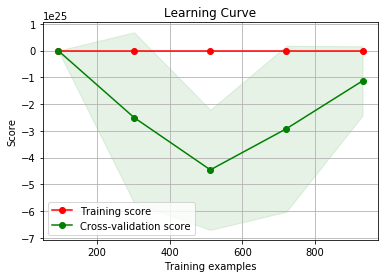

In [43]:
plot_learning_curve(lin_reg, "Learning Curve", X_train, y_train, cv=5)

This is much much much better than our last one (I wrote this before I added all the dummies). High variance might be an issue but our model is quite simple so who knows (see last sentence). They are sort of slowly coming together though, which is nice. I'll start doing some better models now and doing cross validation

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNetCV

In [45]:
SGD = SGDRegressor(tol=.0001) #All of this is cribbed from Tyler's lecture. I would have done more on my own
# but it ended up that this wasn't the best model so I focused on other things that would work better for what I needed
param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3]}

n_iter_search = 8
random_search = RandomizedSearchCV(SGD, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'eta0': 0.003}
Best Negative MSE: -7.732287282461128


/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<module 'matplotlib.pyplot' from '/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

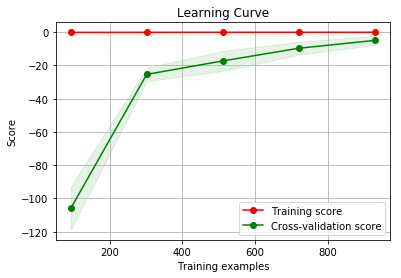

In [46]:
plot_learning_curve(random_search, "Learning Curve", X_train, y_train, cv=5)

In [47]:
clf = ElasticNetCV(l1_ratio=[.1, .3, .5, .7, .8, .9, .95, .99, 1], alphas= [.1, 1, 5, 10]) #basic Elastic Net with CV
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))


Train MSE: 0.012409660191492268
Test MSE: 0.011952752029073884


Okay, this one is starting to look okay. As can be seen from the graph below, the training and test sets are starting to come together, so it might be time for more feature constrution (which never ended up happening). Let's pull out the coefficients to see what does what and if there are certain features that might be more worth constructing that others.

<module 'matplotlib.pyplot' from '/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

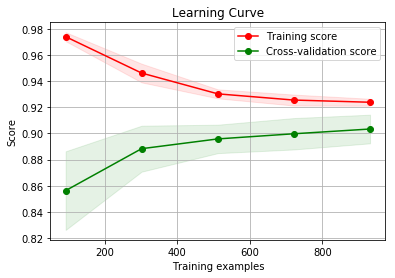

In [48]:
plot_learning_curve(clf, "Learning Curve", X_train, y_train, cv=5)

In [49]:
sorted(list(zip(train_dummies, clf.coef_)), key=lambda x: abs(x[1]))

[('3SsnPorch', 0.0),
 ('BedroomAbvGr', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtHalfBath', 0.0),
 ('BsmtUnfSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('LotArea', 0.0),
 ('LowQualFinSF', -0.0),
 ('MSSubClass', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('PoolArea', 0.0),
 ('YrSold', -0.0),
 ('NoGarage', -0.0),
 ('ExterCondlabel', 0.0),
 ('BsmtCondlabel', 0.0),
 ('GarageCondlabel', 0.0),
 ('PoolQClabel', 0.0),
 ('Alley_Grvl', -0.0),
 ('Alley_None', 0.0),
 ('Alley_Pave', 0.0),
 ('BldgType_2fmCon', -0.0),
 ('BldgType_Duplex', -0.0),
 ('BldgType_Twnhs', -0.0),
 ('BldgType_TwnhsE', -0.0),
 ('BsmtCond_Gd', 0.0),
 ('BsmtCond_None', -0.0),
 ('BsmtCond_Po', -0.0),
 ('BsmtCond_TA', 0.0),
 ('BsmtExposure_Av', 0.0),
 ('BsmtExposure_Mn', 0.0),
 ('BsmtExposure_None', -0.0),
 ('BsmtFinType1_ALQ', 0.0),
 ('BsmtFinType1_BLQ', 0.0),
 ('BsmtFinType1_LwQ', -0.0),
 ('BsmtFinType1_None', -0.0),
 ('BsmtFinType1_Rec', -0.0),
 ('BsmtFinType1_Unf', -0.0),
 ('BsmtFinType2_ALQ', 0.0),
 ('BsmtFinType2_BLQ', -0.0),
 ('BsmtFi

In [50]:
# I was going to try to boot strap my coefficients but it was taking too long and I gave up because I had more
# important things to do
"""from sklearn.utils import resample
n_bootstraps = 1000
bootstrap_X = []
bootstrap_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(X_train, y_train)
    bootstrap_X.append(sample_X)
    bootstrap_y.append(sample_y)
    
coeffs = []
for i, data in enumerate(bootstrap_X):
    clf.fit(data, bootstrap_y[i])
    for e in clf.coef_:
        if abs(e) < 0.01:
            pass
        else:
            coeffs.append(clf.coef_)
    
coef_df = pd.DataFrame(coeffs, columns=train_dummies)
coef_df.plt(kind='box')
plt.xticks(rotation=90)"""

"from sklearn.utils import resample\nn_bootstraps = 1000\nbootstrap_X = []\nbootstrap_y = []\nfor _ in range(n_bootstraps):\n    sample_X, sample_y = resample(X_train, y_train)\n    bootstrap_X.append(sample_X)\n    bootstrap_y.append(sample_y)\n    \ncoeffs = []\nfor i, data in enumerate(bootstrap_X):\n    clf.fit(data, bootstrap_y[i])\n    for e in clf.coef_:\n        if abs(e) < 0.01:\n            pass\n        else:\n            coeffs.append(clf.coef_)\n    \ncoef_df = pd.DataFrame(coeffs, columns=train_dummies)\ncoef_df.plt(kind='box')\nplt.xticks(rotation=90)"

In [51]:
def coef_extract(coef_names, coef_, sensitivity): # function to extract a list of coefficients above a given sensitivty
    coef_dict = dict((zip(coef_names, coef_))) #creates a dictionary from the model's coeffiecients
    coef_list = {} # another dictionary
    for key in coef_dict: # runs through the zipped dictionary 
        x = coef_dict.get(key) # extracts value for the key
        if abs(x) > sensitivity:  # if the absolute value is bigger than the sensitivity
            coef_list[key] = x # adds a new entry to the other dictionary 
        else: # if the coefficient isn't big enough
            pass # move to the next key
    coef_list = key_extract(coef_list) # uses a previous function I wrote to make a list of the names of those coeff
    return coef_list # returns that list
coef_list = coef_extract(train_dummies, clf.coef_, .001) #extract all positive coefficients (in this case)
better_train = train_dummies[coef_list] # sliced dataframes for nearest neighbors
better_test = testr_dummies[coef_list] # sliced dataframes for nearest neighbors 

coef_list2 = coef_extract(train_dummies, clf.coef_, .005) # I wanted a higher sensitivity for my polynomials
better_train2 = train_dummies[coef_list2] # sliced for polynomial elastic net
better_test2 = testr_dummies[coef_list2] # sliced for polynomial elastic net

Since we've talked about it, I will try a nearest neighbors regressor model as well.

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [53]:
scaler = StandardScaler()
scaler.fit(better_train) # scales my sliced dataframe
scaled_df = scaler.transform(better_train)
X_traink, X_testk, y_traink, y_testk = train_test_split(better_train, target, test_size=0.20, random_state=35)
# new test train split for nearest neighbors

In [54]:
knn = KNeighborsRegressor() # calls the function
gridsearch = GridSearchCV(knn, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error') # gridsearch to find the best
# thanks Tyler for your wonderful guide on how to do this
gridsearch.fit(X_traink, y_traink) # trains the search on the data
print("Best Params: {}".format(gridsearch.best_params_)) # see what was best
y_pred_train = gridsearch.predict(X_traink) # predictions
y_pred_test = gridsearch.predict(X_testk) # predictions
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_traink, y_pred_train),
                                           mean_squared_error(y_testk, y_pred_test))) # check performance

Best Params: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Train MSE: 0.0	Test MSE: 0.035557509025334


This performed more poorly than the SGD regression using the coefficients list. Maybe I can make a smaller set though. Actually the smaller set of coefficients just made it less predictive, not more predictive.

In [55]:
from sklearn.preprocessing import PolynomialFeatures #once again, thanks Tyler for showing how to do this
poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(better_train2) # using the other sliced data set
scaled_poly_df = scaler.fit_transform(poly_df) 
print(scaled_poly_df.shape) 
X_trainp, X_testp, y_trainp, y_testp = train_test_split(scaled_poly_df, target, test_size=0.20, random_state=19)

(1455, 779)


In [56]:
clfp = ElasticNetCV(l1_ratio=[.1, .3, .5, .7, .8, .9, .95, .99, 1], alphas= [.1, 1, 5, 10]) # elastic net like earlier
# I gave it a different name so that it wouldn't mess with everything based on clf
clfp.fit(X_trainp, y_trainp) 
train_predictions = clfp.predict(X_trainp)
test_predictions = clfp.predict(X_testp)
print("Train MSE: {}".format(mean_squared_error(y_trainp, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_testp, test_predictions)))

Train MSE: 0.01201696104591864
Test MSE: 0.013933082175358668


I have exactly one submission left before I can't submit anymore before the project is due, so I have decided to go out with a bang and try a decision tree using http://scikit-learn.org/0.19/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor as a guide. I have no idea how it will perform but the only way I'll do better with the time I have left is with a new model, since I don't really have time for feature construction or better data cleaning.

In [57]:
from sklearn.tree import DecisionTreeRegressor # get the regressor
dtr = DecisionTreeRegressor(max_depth = 8, min_samples_leaf=6) #not sure what these mean, but these with these numbers
# reduced my test MSE the most. I should have used a grid search though
dtr.fit(X_train, y_train)
train_predictions = dtr.predict(X_train)
test_predictions = dtr.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.012830916125751563
Test MSE: 0.028040193899499067


That is not performing better than the elastic net so I guess I won't be using my final submission on it after all. And since I have no idea how to use Neural Networks, that performed really poorly as well. And I have no idea what a Linear SVR model is, but I saw it on the Scikit Learn website and figured it was worth a try. Performed better than the neural network, at least

In [58]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
train_predictions = mlp.predict(X_train)
test_predictions = mlp.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.008795661224535099
Test MSE: 5.663216349943777


In [59]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(X_traink, y_traink)
train_predictions = svr.predict(X_traink)
test_predictions = svr.predict(X_testk)
print("Train MSE: {}".format(mean_squared_error(y_traink, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_testk, test_predictions)))

Train MSE: 0.19793990885852902
Test MSE: 0.1622855401369045


## Importing to Kaggle

Note, I directly copy pasted the code for how to submit (the final code block) from a guide on kaggle called something like "how to submit on kaggle". 

In [60]:
testr_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1455 to 2913
Columns: 312 entries, 1stFlrSF to AllArea
dtypes: float64(12), int64(36), uint8(264)
memory usage: 923.4 KB


In [61]:
scaler = StandardScaler()
scaler.fit(testr_dummies)
testr_scale = scaler.transform(testr_dummies)

In [62]:
test_predictions = clf.predict(testr_scale) #makes predictions based on the model trained earlier
test_predictions = np.exp(test_predictions) # returns the prices to what they should be

In [63]:
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': test_predictions})
my_submission.to_csv('submission.csv', index=False)

According to kaggle, the elastic net did significantly better than the SGD. This is unsurprising. Also I learned that the reason my models were performing so badly was that I forgot to unscale the data. When I managed to get the ordinal variables to be actually ordered according to a certain map, my moved up slightly more.